# Learning Rate Schedule For Training Models
* The classical algorithm to train neural networks is called **stochastic gradient descent**.
* Adapting the learning rate for our stochastic gradient descent optimization procedure can increase performance and reduce training time.(**learning rate annealing** or **adaptive learning rates**).
* Two popular and easy to use learning rate schedules are:
    * Decrease the learning rate gradually based on the epoch
    * Decrease the learning rate using punctuated large drops at specific epochs.

* The dataset describes radar returns where the target was free electrons in the ionosphere. It is a binary classification problem where positive cases (g for good) show evidence of some type of structure in the ionosphere and negative cases (b for bad) do not.


# 1. Time-Based Learning Rate Schedule
* The stochastic gradient descent optimization algorithm implementation in the SGD class has an argument called **decay**.
* This argument is used in the time-based learning rate decay schedule as follows :

LearningRate = LearningRate * 1/1 + decay*epoch

* When the decay argument is specified,it will decrease the learning rate from the previous epoch by the given fixed amount.
* For example, if we use the initial learning rate value of 0.1 and the decay of 0.001,the first 5 epochs will adapt the learning rate as follows:

Epoch Learning Rate
1     0.1
2     0.0999000999
3     0.0997006985
4     0.09940249103
5     0.09900646517
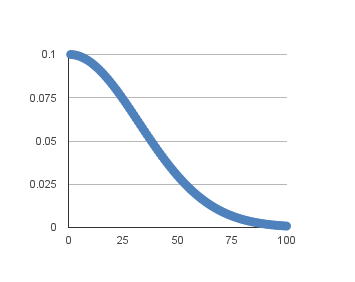


In [4]:
# Time Based Learning Rate Decay
import pandas
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder

# fix random seed for reproducibility'
seed = 7
numpy.random.seed(seed)

# load dataset
dataframe = pandas.read_csv('ionosphere.csv',header=None)
dataset = dataframe.values

# split into input(X) and output(Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34,input_dim=34,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# compile model
epochs = 50
learning_rate = 0.1
decay_rate = learning_rate/epochs
momentum = 0.8
sgd = SGD(lr=learning_rate,momentum=momentum,decay=decay_rate,nesterov=False)
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])

# fit the model
model.fit(X,Y,validation_split=0.33,epochs=epochs,batch_size=28,verbose=2)

Epoch 1/50
9/9 - 1s - loss: 0.6827 - accuracy: 0.5362 - val_loss: 0.4217 - val_accuracy: 0.8793
Epoch 2/50
9/9 - 0s - loss: 0.4970 - accuracy: 0.8085 - val_loss: 0.4160 - val_accuracy: 0.9138
Epoch 3/50
9/9 - 0s - loss: 0.3875 - accuracy: 0.8468 - val_loss: 0.3899 - val_accuracy: 0.9483
Epoch 4/50
9/9 - 0s - loss: 0.3029 - accuracy: 0.8936 - val_loss: 0.2499 - val_accuracy: 0.9569
Epoch 5/50
9/9 - 0s - loss: 0.2416 - accuracy: 0.9277 - val_loss: 0.2108 - val_accuracy: 0.9655
Epoch 6/50
9/9 - 0s - loss: 0.2046 - accuracy: 0.9319 - val_loss: 0.1258 - val_accuracy: 0.9741
Epoch 7/50
9/9 - 0s - loss: 0.1898 - accuracy: 0.9574 - val_loss: 0.1720 - val_accuracy: 0.9741
Epoch 8/50
9/9 - 0s - loss: 0.1758 - accuracy: 0.9404 - val_loss: 0.1974 - val_accuracy: 0.9828
Epoch 9/50
9/9 - 0s - loss: 0.1538 - accuracy: 0.9617 - val_loss: 0.1162 - val_accuracy: 0.9914
Epoch 10/50
9/9 - 0s - loss: 0.1494 - accuracy: 0.9574 - val_loss: 0.1501 - val_accuracy: 0.9741
Epoch 11/50
9/9 - 0s - loss: 0.1343 - a

# 2. Drop-Based Learning Rate Schedule
* It is to systematically drop the learning rate at specific times during training.
* Often this method is implemented by dropping the learning rate by half every fixed number of epochs.

In [6]:
# Drop-Based Learning Rate Decay
import pandas
import numpy 
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import LearningRateScheduler

# learning rate schedule
def step_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop,math.floor((1+epoch)/epochs_drop))
    return lrate

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# load dataset
dataframe = pandas.read_csv('ionosphere.csv',header=None)
dataset = dataframe.values

# split into input (X) and output (Y) variables
X = dataset[:,0:34].astype(float)
Y = dataset[:,34]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

# create model
model = Sequential()
model.add(Dense(34,input_dim=34,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

# compile model
sgd = SGD(lr=0.0,momentum=0.9,decay=0.0,nesterov=False)
model.compile(loss='binary_crossentropy',optimizer=sgd,metrics=['accuracy'])

# learning schedule callback
llrate = LearningRateScheduler(step_decay)
callbacks_list = [llrate]

# Fit the model
model.fit(X,Y,validation_split=0.33,epochs=50,batch_size=28,callbacks=callbacks_list,verbose=2)

Epoch 1/50
9/9 - 1s - loss: 0.5828 - accuracy: 0.6979 - val_loss: 0.3812 - val_accuracy: 0.9310
Epoch 2/50
9/9 - 0s - loss: 0.3616 - accuracy: 0.8766 - val_loss: 0.3185 - val_accuracy: 0.9569
Epoch 3/50
9/9 - 0s - loss: 0.2745 - accuracy: 0.8936 - val_loss: 0.1507 - val_accuracy: 0.9655
Epoch 4/50
9/9 - 0s - loss: 0.1841 - accuracy: 0.9447 - val_loss: 0.0852 - val_accuracy: 0.9828
Epoch 5/50
9/9 - 0s - loss: 0.1369 - accuracy: 0.9617 - val_loss: 0.3970 - val_accuracy: 0.7931
Epoch 6/50
9/9 - 0s - loss: 0.2189 - accuracy: 0.9149 - val_loss: 0.1372 - val_accuracy: 0.9569
Epoch 7/50
9/9 - 0s - loss: 0.1594 - accuracy: 0.9532 - val_loss: 0.0707 - val_accuracy: 0.9914
Epoch 8/50
9/9 - 0s - loss: 0.1346 - accuracy: 0.9574 - val_loss: 0.1052 - val_accuracy: 0.9914
Epoch 9/50
9/9 - 0s - loss: 0.1162 - accuracy: 0.9660 - val_loss: 0.0848 - val_accuracy: 0.9828
Epoch 10/50
9/9 - 0s - loss: 0.1042 - accuracy: 0.9574 - val_loss: 0.0776 - val_accuracy: 0.9828
Epoch 11/50
9/9 - 0s - loss: 0.0935 - a

# Summary
* Increase the initial learning rate
* Use a large momentum
* Experiment with different schedules

* Finall